In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
from benchmarks.runs.exploring_utils import RunAnalyser, adaptive_filter, non_adaptive_filter, model_filter
import re

In [3]:
run_path = '../'
test_name = 'taylorgreen'
test_path = os.path.join(run_path, test_name)

In [4]:
runs = sorted([m for m in os.listdir(test_path) if os.path.isdir(os.path.join(test_path, m))])
analyser = RunAnalyser(runs, test_path)

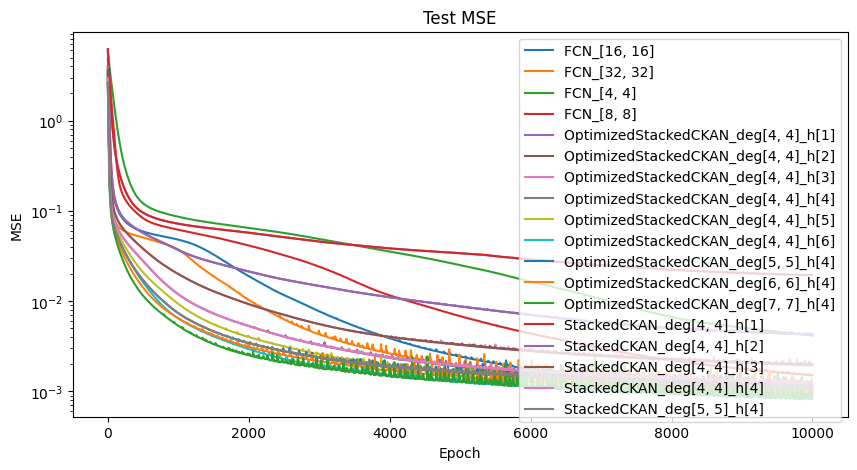

In [30]:
analyser.plot_mses()

<Figure size 700x700 with 0 Axes>

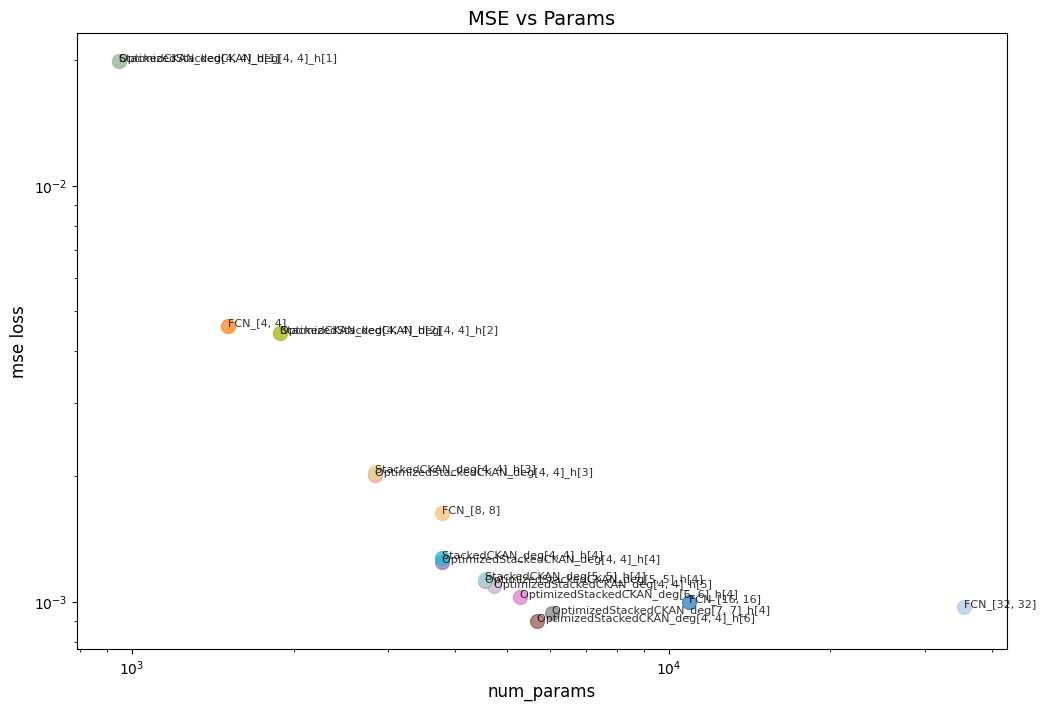

In [5]:
analyser.plot_mse_over_params()

<Figure size 700x700 with 0 Axes>

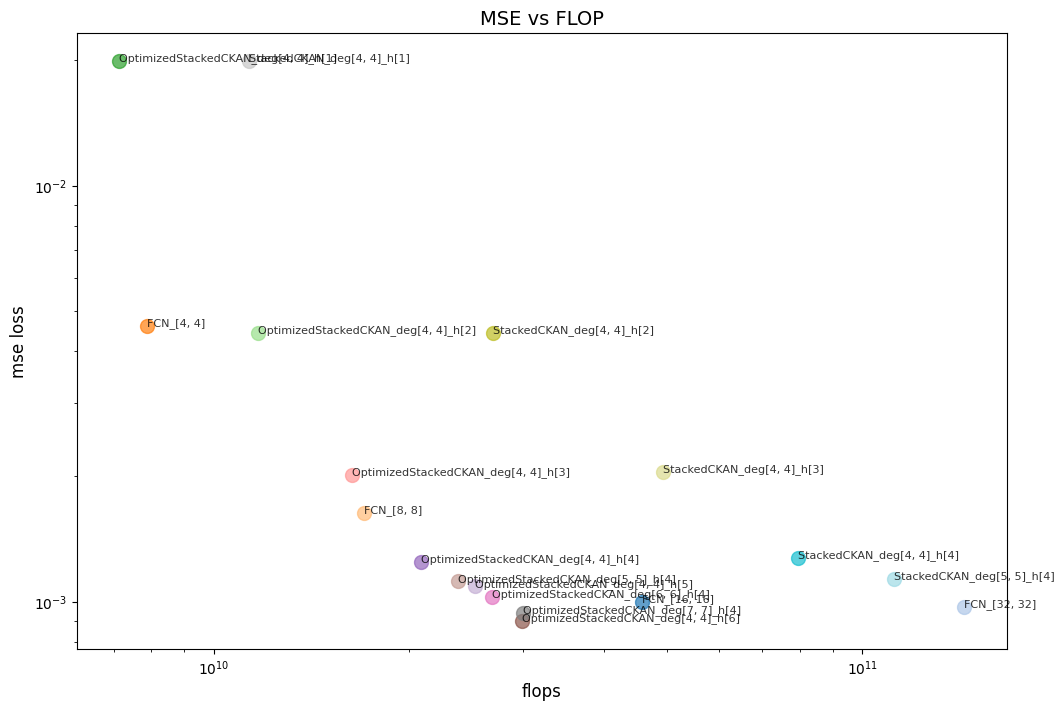

In [6]:
analyser.plot_mse_over_flops()

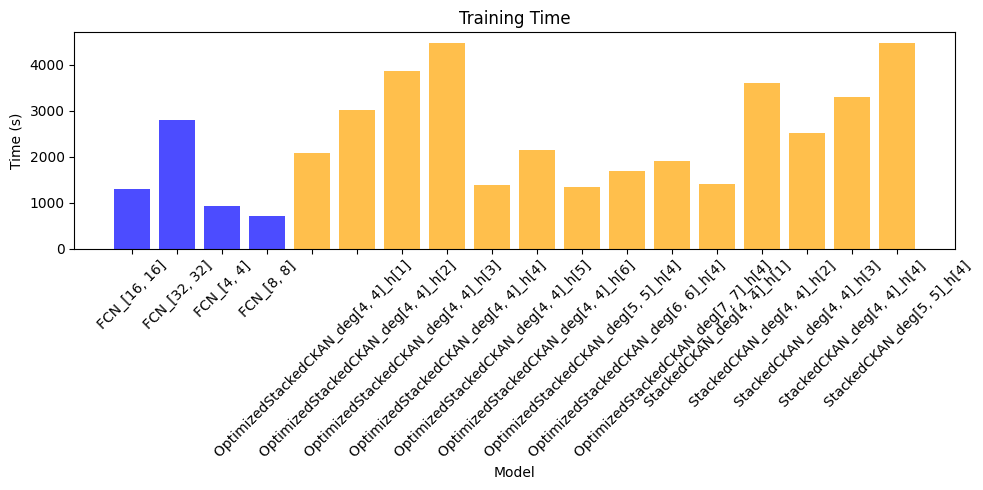

In [7]:
analyser.plot_training_times(filter=lambda x: 'Stacked' in x or 'FCN' in x)

<Figure size 700x700 with 0 Axes>

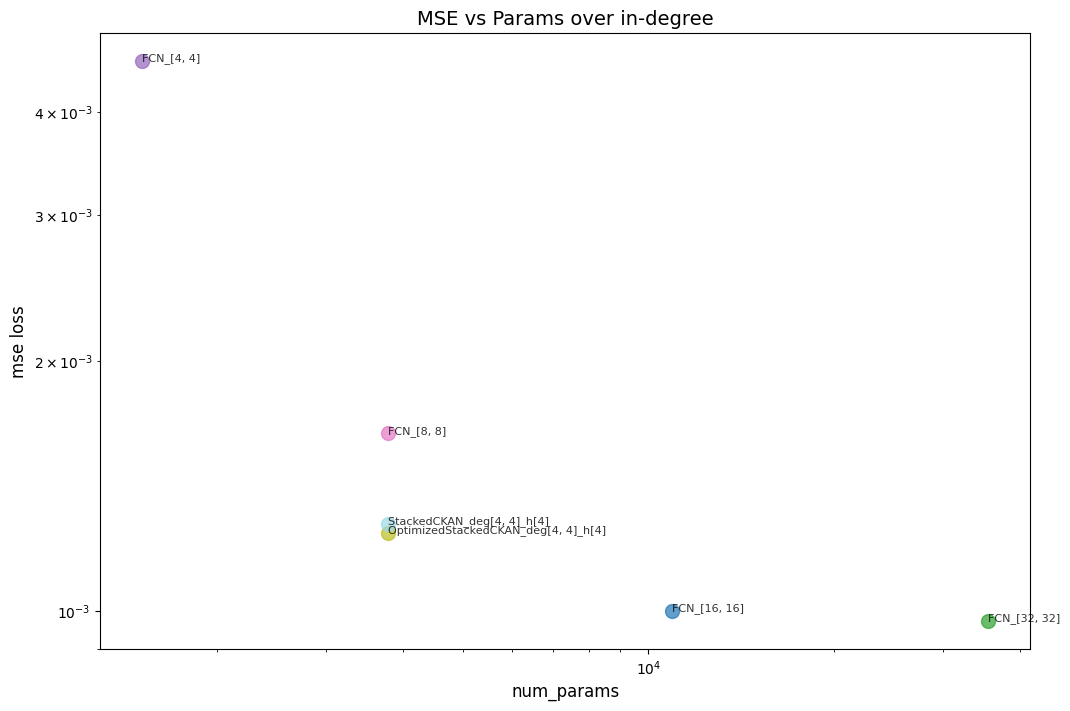

In [8]:
analyser.plot_mse_over_params(filter=lambda x: 'StackedCKAN_deg[' in x and ' 4]_h[4]' in x or 'FCN' in x, title='MSE vs Params over in-degree')

<Figure size 700x700 with 0 Axes>

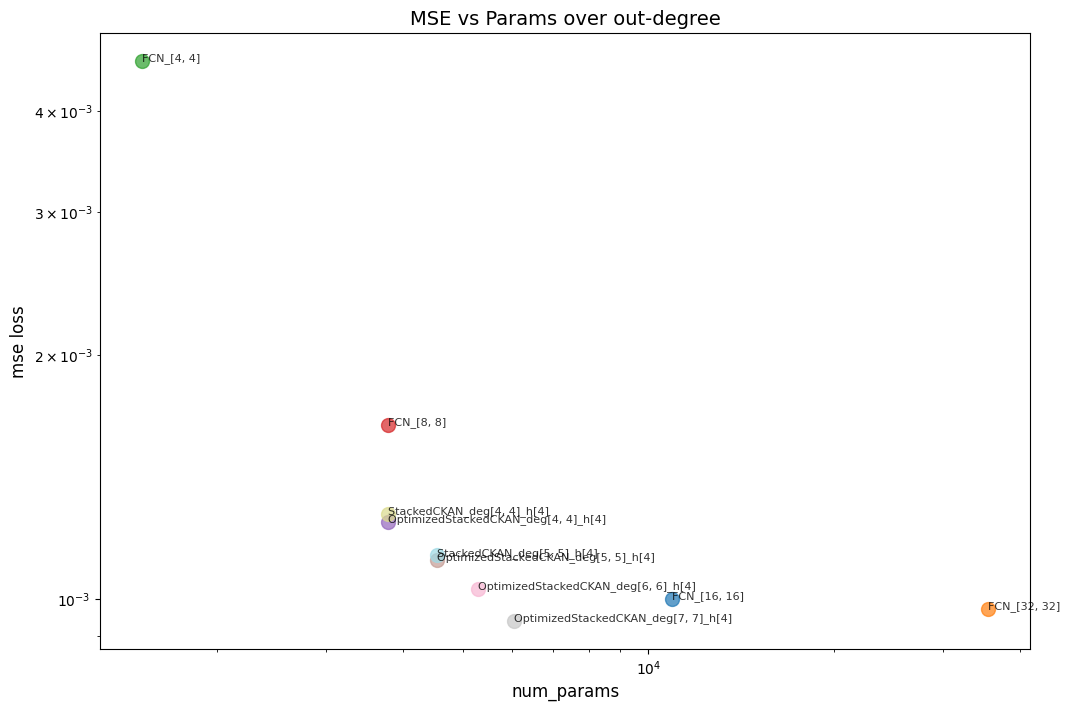

In [9]:
analyser.plot_mse_over_params(filter=lambda x: 'StackedCKAN_deg[' in x and ']_h[4]' in x or 'FCN' in x, title='MSE vs Params over out-degree')

<>:1: SyntaxWarning: invalid escape sequence '\['
<>:1: SyntaxWarning: invalid escape sequence '\['
/tmp/ipykernel_1106594/4148977264.py:1: SyntaxWarning: invalid escape sequence '\['
  analyser.plot_mse_over_params(filter=lambda x: re.match('OptimizedStackedCKAN_deg\[4, 4]_h\[[0-9]]', x), title='Varying hidden dimensions', noshow=True)


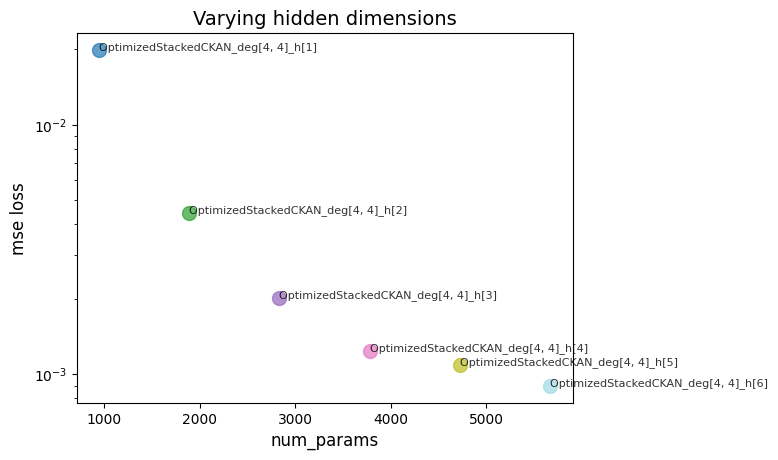

In [10]:
analyser.plot_mse_over_params(filter=lambda x: re.match('OptimizedStackedCKAN_deg\[4, 4]_h\[[0-9]]', x), title='Varying hidden dimensions', noshow=True)
plt.xscale('linear')


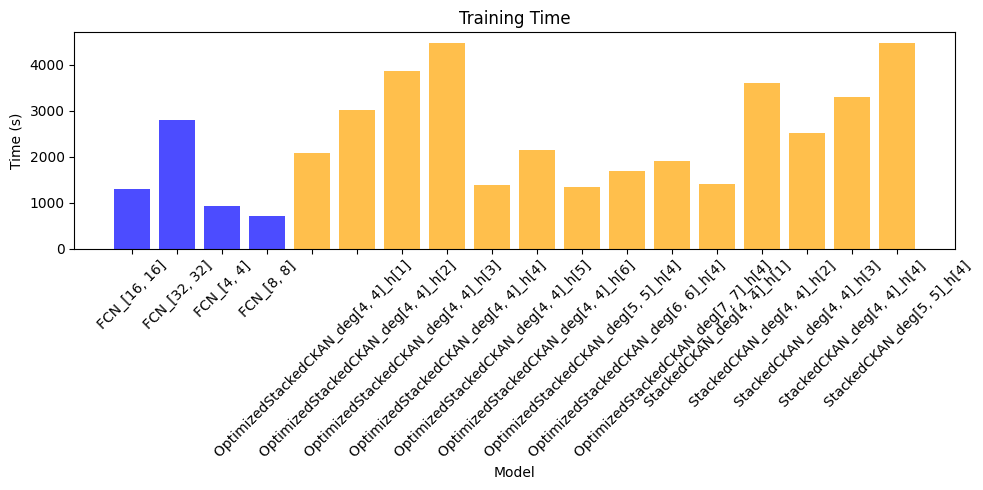

In [11]:
analyser.plot_training_times()

<>:15: SyntaxWarning: invalid escape sequence '\['
<>:15: SyntaxWarning: invalid escape sequence '\['
<>:18: SyntaxWarning: invalid escape sequence '\['
<>:18: SyntaxWarning: invalid escape sequence '\['
<>:15: SyntaxWarning: invalid escape sequence '\['
<>:15: SyntaxWarning: invalid escape sequence '\['
<>:18: SyntaxWarning: invalid escape sequence '\['
<>:18: SyntaxWarning: invalid escape sequence '\['
/tmp/ipykernel_1106594/1360577126.py:15: SyntaxWarning: invalid escape sequence '\['
  analyser.plot_mse_over_params(filter=lambda x: re.match('OptimizedStackedCKAN_deg\[[0-9], [0-9]]_h\[4]', x) or re.match('FCN_\[[0-9]*, [0-9]*]', x), title='Varying polynomial degree', noshow=True)
/tmp/ipykernel_1106594/1360577126.py:15: SyntaxWarning: invalid escape sequence '\['
  analyser.plot_mse_over_params(filter=lambda x: re.match('OptimizedStackedCKAN_deg\[[0-9], [0-9]]_h\[4]', x) or re.match('FCN_\[[0-9]*, [0-9]*]', x), title='Varying polynomial degree', noshow=True)
/tmp/ipykernel_1106594/1

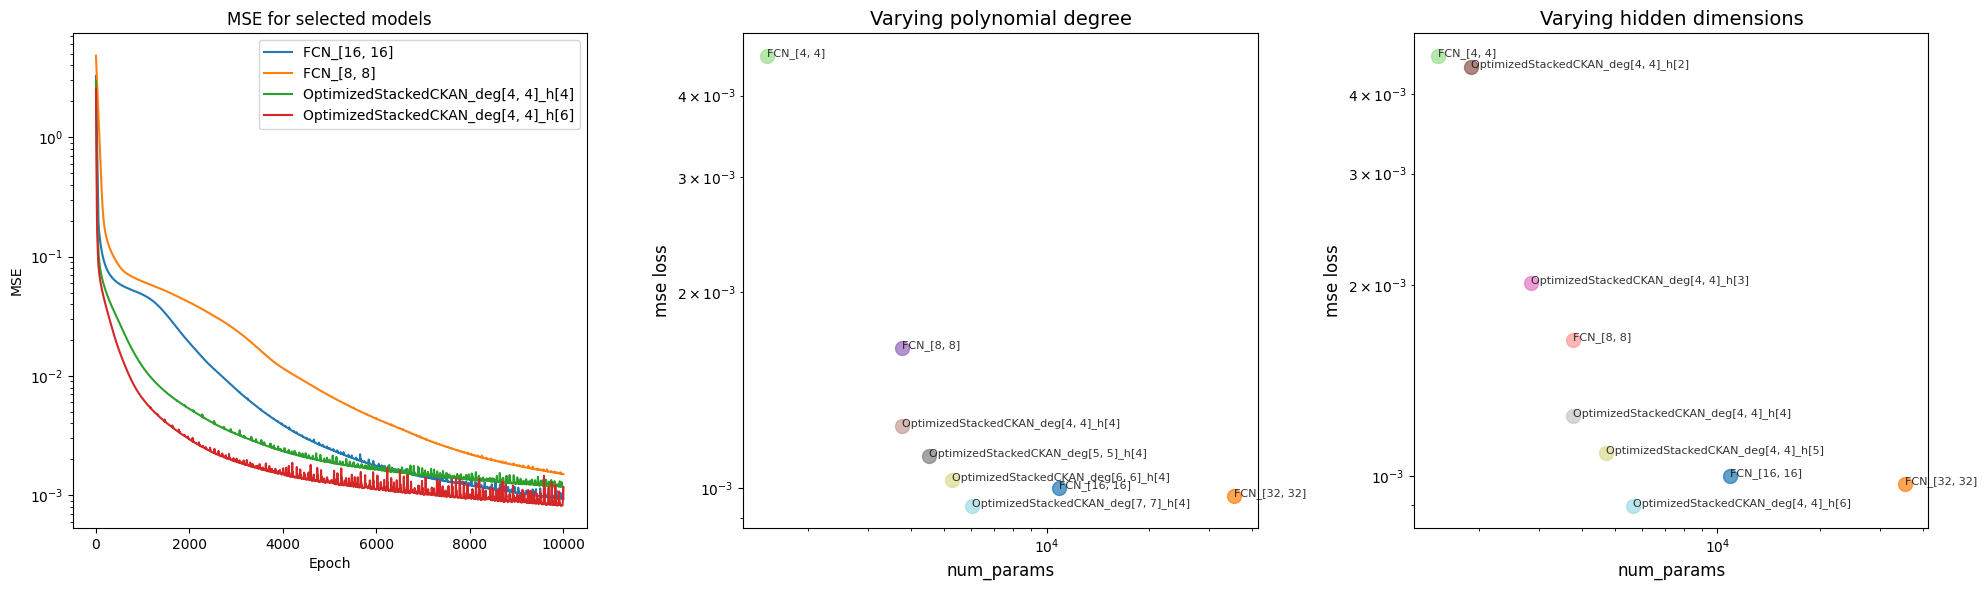

In [53]:
plt.figure(figsize=(20, 6))

l1 = [
    'FCN_[8, 8]',
    'OptimizedStackedCKAN_deg[4, 4]_h[4]',
    'FCN_[16, 16]',
    'OptimizedStackedCKAN_deg[4, 4]_h[6]',
]

plt.subplot(1, 3, 1)
analyser.plot_mses(filter = lambda x: x in l1, noshow=True)
plt.title('MSE for selected models')

plt.subplot(1, 3, 2)
analyser.plot_mse_over_params(filter=lambda x: re.match('OptimizedStackedCKAN_deg\[[0-9], [0-9]]_h\[4]', x) or re.match('FCN_\[[0-9]*, [0-9]*]', x), title='Varying polynomial degree', noshow=True)

plt.subplot(1, 3, 3)
analyser.plot_mse_over_params(filter=lambda x: re.match('OptimizedStackedCKAN_deg\[4, 4]_h\[(?!1\])\d+]', x) or re.match('FCN_\[[0-9]*, [0-9]*]', x), title='Varying hidden dimensions', noshow=True)

plt.tight_layout()
plt.show()

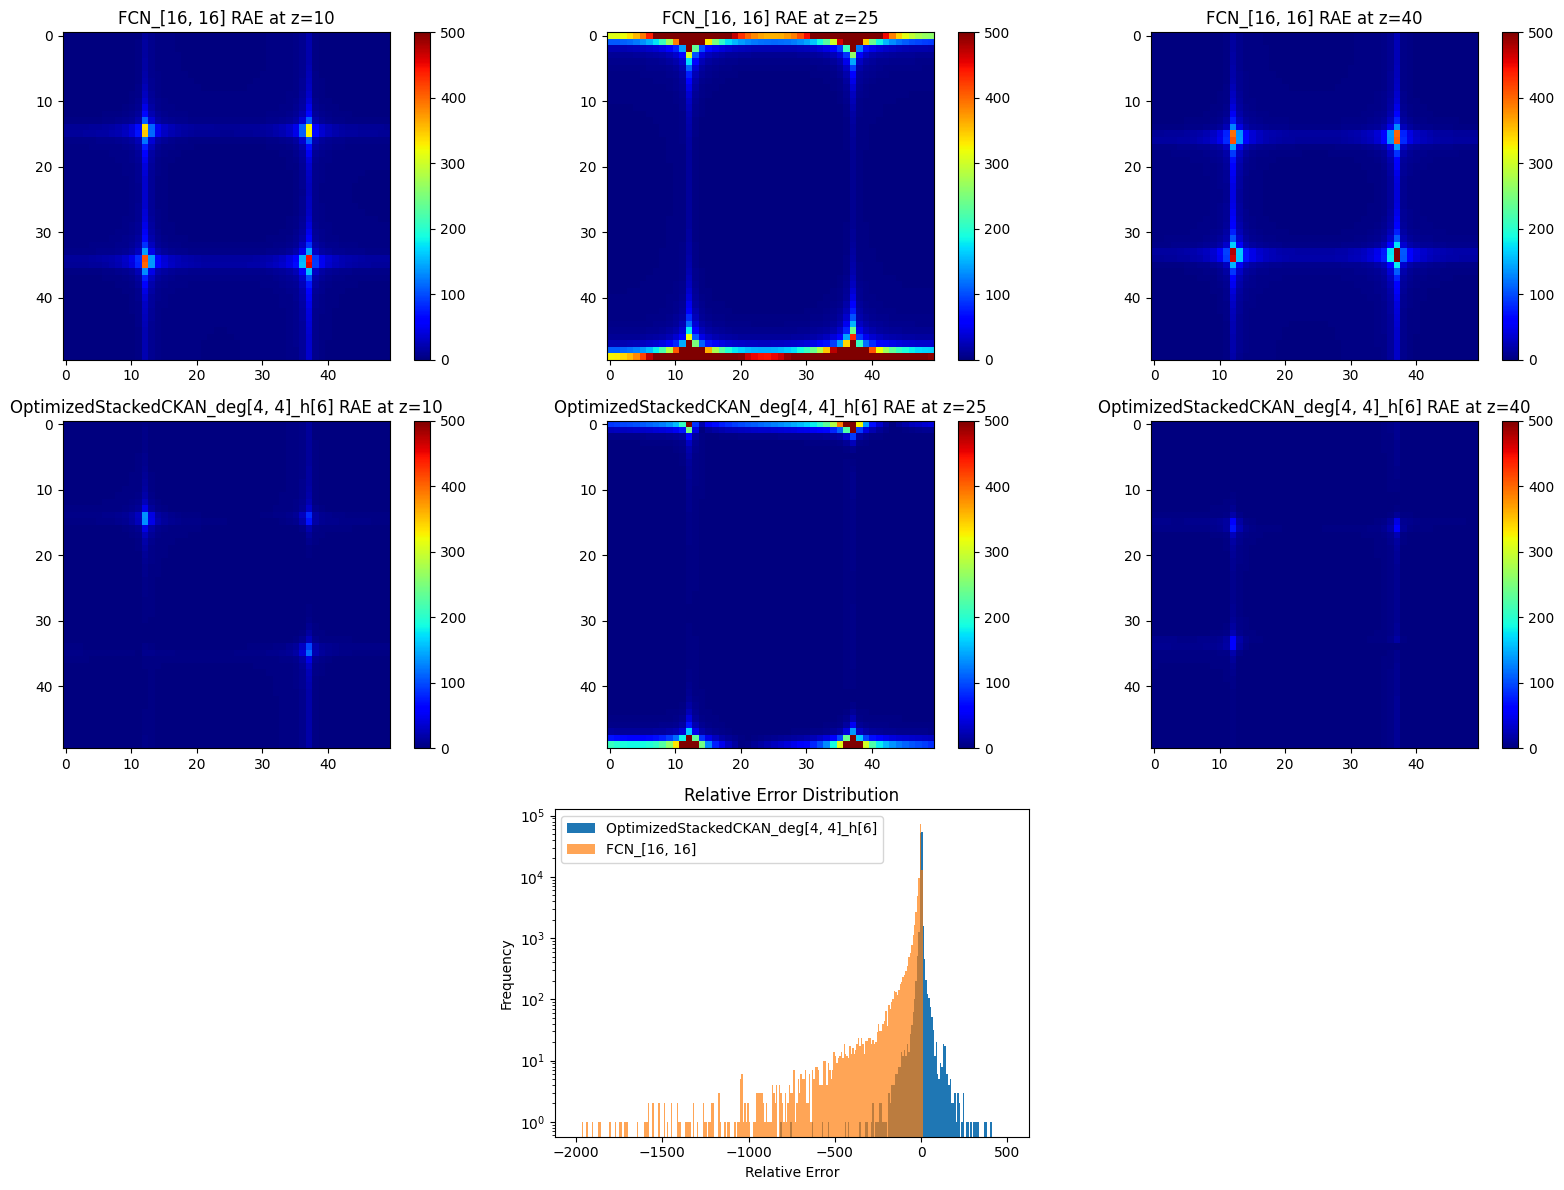

In [43]:
model1 = 'OptimizedStackedCKAN_deg[4, 4]_h[6]'
model2 = 'FCN_[16, 16]'
with open(f'/vol/bitbucket/ss7921/FBPINNs/benchmarks/runs/taylorgreen/{model1}/test_0_10000.npy', 'rb') as f:
    pred0_ckan = np.load(f).reshape(50, 50, 50, -1)
with open(f'/vol/bitbucket/ss7921/FBPINNs/benchmarks/runs/taylorgreen/{model2}/test_0_10000.npy', 'rb') as f:
    pred0_fcn = np.load(f).reshape(50, 50, 50, -1)
with open(f'/vol/bitbucket/ss7921/FBPINNs/benchmarks/runs/taylorgreen/{model2}/test_exact_0.npy', 'rb') as f:
    exact0 = np.load(f).reshape(50, 50, 50, -1)

rae = lambda exact, pred: (np.abs(exact - pred) / (np.abs(exact)))
rE = lambda exact, pred: ((exact - pred) / (np.abs(exact)))

plt.figure(figsize=(16, 12))

slice=3
vmin, vmax = 0, 0.003

rae1 = rae(exact0[:, :, :, slice], pred0_fcn[:, :, :, slice])
rae2 = rae(exact0[:, :, :, slice], pred0_ckan[:, :, :, slice])

ss = [10, 25, 40]
maxes = [500, 500, 500]

for i, s in enumerate(ss):
    plt.subplot(3, 3, i+1)
    plt.imshow(rae1[s, :, :], cmap='jet', vmin=0, vmax=maxes[i])
    plt.title(f'{model2} RAE at z={s}')
    plt.colorbar()

for i, s in enumerate(ss):
    plt.subplot(3, 3, 3+i+1)
    plt.imshow(rae2[s, :, :], cmap='jet', vmin=0, vmax=maxes[i])
    plt.title(f'{model1} RAE at z={s}')
    plt.colorbar()

plt.subplot(3, 3, 8)
i1, i2 = 1, 49
r = (-2000, 500)
re_ckan = rE(exact0[i1:i2, i1:i2, i1:i2, slice], pred0_ckan[i1:i2, i1:i2, i1:i2, slice])
re_fcn = rE(exact0[i1:i2, i1:i2, i1:i2, slice], pred0_fcn[i1:i2, i1:i2, i1:i2, slice])
plt.hist(re_ckan.flatten(), bins=300, label=model1, range=r)
plt.hist(re_fcn.flatten(), bins=300, label=model2, range=r, alpha=0.7)
plt.legend()
plt.xlabel('Relative Error')
plt.ylabel('Frequency')
plt.yscale('log')
plt.title('Relative Error Distribution')

# xs = np.linspace(0, 1, 200)
# plt.subplot(2, 2, 4)
# plt.plot(xs, rae(exact0[:, 100, slice], pred0_ckan[:, 100, slice]), label=model1)
# plt.plot(xs, rae(exact0[:, 100, slice], pred0_fcn[:, 100, slice]), label=model2)
# plt.legend()
# plt.title('Relative Absolute Error along y=0.5 of Horizontal Velocity output \'u\'')

plt.tight_layout()
plt.show()

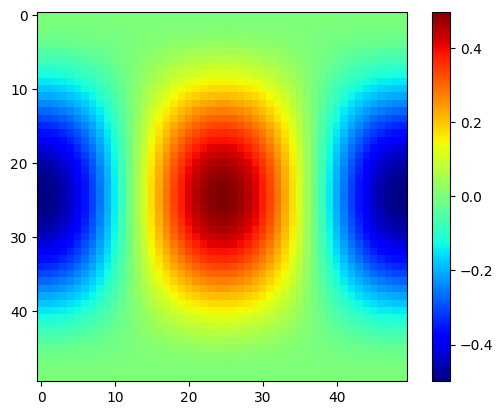

In [41]:
plt.imshow(exact0[25, :, :, 3], cmap='jet')
plt.colorbar()

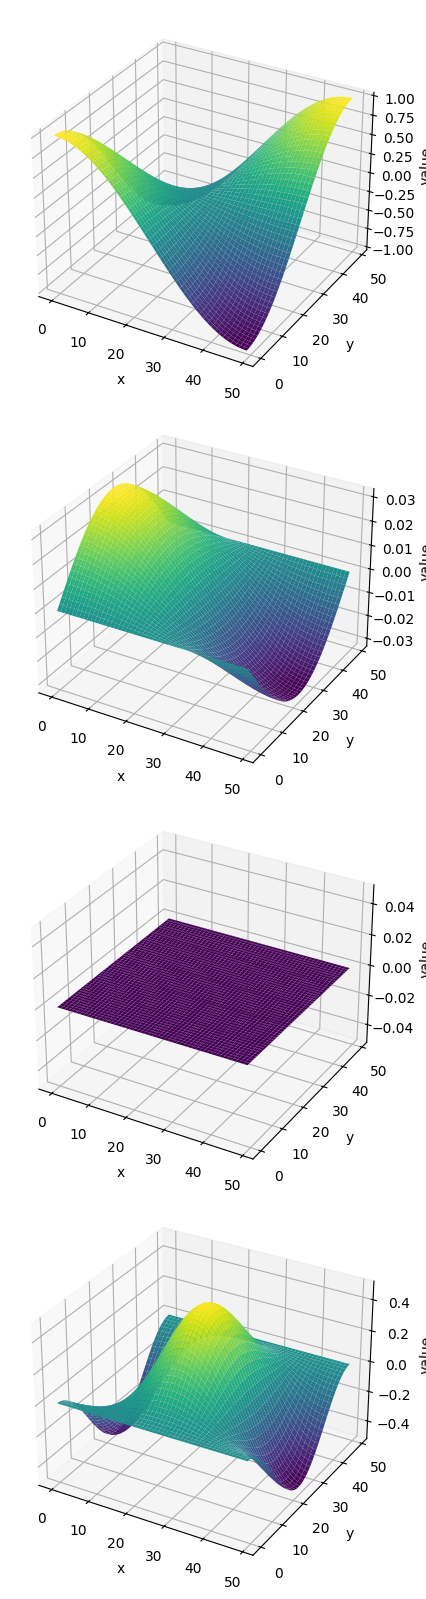

In [28]:
def plot_sch(data_list, noshow=False, ax=None):
    # Example: generating some data of shape (2, 200, 200) (real and imaginary)
    data = data_list
    n_fields, Ny, Nx = data.shape
    y = np.arange(Ny)
    x = np.arange(Nx)
    X, Y = np.meshgrid(x, y)
    
    # titles = ['wave']  # extend or truncate as needed

    if noshow and ax is None:
        raise ValueError("If noshow is True, a axis must be provided.")

    # create one tall figure with n_fields rows
    if not noshow:
        fig = plt.figure(figsize=(8, 4 * n_fields))
    for i in range(n_fields):
        if not noshow:
            ax = fig.add_subplot(n_fields, 1, i+1, projection='3d')
            
        # 100 levels; use ax.contour3D (alias for Axes3D.contour)
        cont = ax.plot_surface(X, Y, data[i], cmap='viridis')
        ax.set_xlabel('x')
        ax.set_ylabel('y')
        ax.set_zlabel('value')
        # ax.set_title(titles[i] if i < len(titles) else f'field {i}')
        
    if not noshow:
        plt.tight_layout()
        plt.show()

plot_sch(exact0[25, :, :, :].transpose(2, 0, 1), noshow=False)

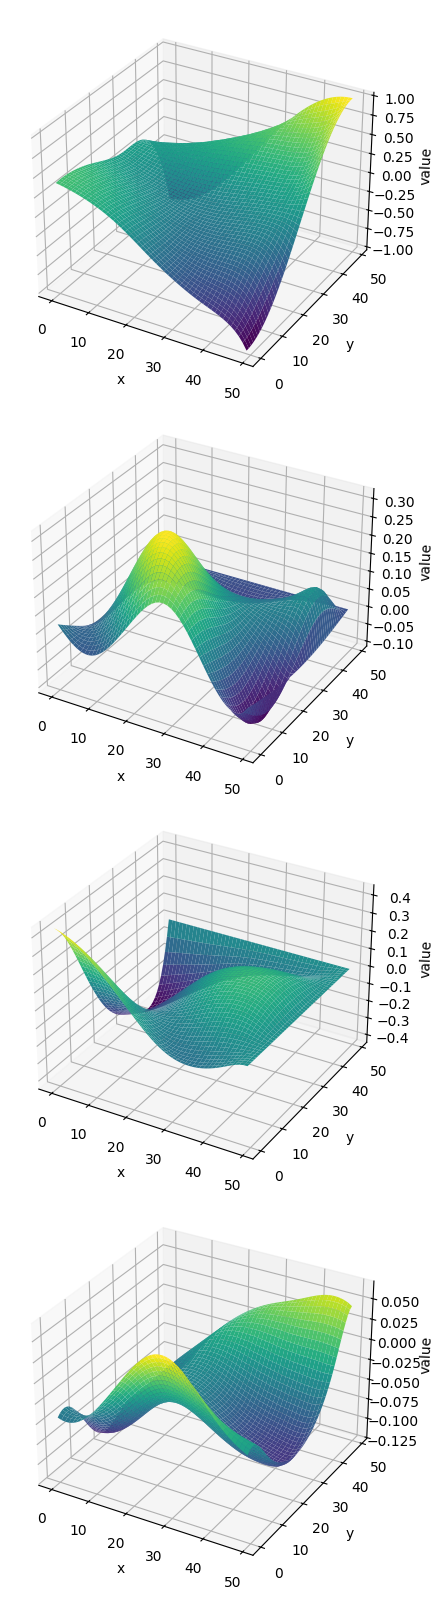

In [39]:
plot_sch(pred0_ckan[25, :, :, :].transpose(2, 0, 1), noshow=False)